In [ ]:
import pandas as pd

data = pd.read_csv(r'C:\Users\VARUN\Desktop\Python\ML\creditcard.csv')#loding the dataset

print("Shape of the dataset:", data.shape)#shape of data

print("\nFirst 5 rows of the dataset:")
print(data.head())#head of data

print("\nDataset Information:")
print(data.info())#information about the data


Shape of the dataset: (284807, 31)

First 5 rows of the dataset:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -

In [ ]:
from sklearn.preprocessing import StandardScaler

print("Missing values in each column:\n", data.isnull().sum())# Checking for missing values

scaler = StandardScaler()
data['Amount_scaled'] = scaler.fit_transform(data['Amount'].values.reshape(-1, 1))
data['Time_scaled'] = scaler.fit_transform(data['Time'].values.reshape(-1, 1))# Scaling 'Amount' and 'Time'

data = data.drop(['Amount', 'Time'], axis=1)#drop

columns = [col for col in data.columns if col != 'Class'] + ['Class']# Reordering columns to have 'Class' at the end
data = data[columns]

print("\nShape after preprocessing:", data.shape)
print("Columns:\n", data.columns.tolist())#final shape and columns of the dataset


Missing values in each column:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Shape after preprocessing: (284807, 31)
Columns:
 ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount_scaled', 'Time_scaled', 'Class']


In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

X = data.drop('Class', axis=1)# Step 1: Split data into features (X) 
y = data['Class']# target variable (y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)#Train-test split 

#Check class distribution before SMOTE
print("Before SMOTE:")
print(y_train.value_counts())

#Apply SMOTE on training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

#Check class distribution after SMOTE
print("\nAfter SMOTE:")
print(pd.Series(y_train_resampled).value_counts())


Before SMOTE:
Class
0    227451
1       394
Name: count, dtype: int64


c:\Users\VARUN\anaconda3\envs\gpu\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(



After SMOTE:
Class
0    227451
1    227451
Name: count, dtype: int64


First 10 predictions and Their Probality of Being Fraud:
[0 0 0 0 0 0 0 0 0 0]
[1.6062846e-07 1.4270454e-07 7.5835715e-07 3.7686871e-08 2.4946050e-06
 1.1703870e-07 7.1990506e-08 9.1872700e-08 7.9582172e-08 2.7914942e-07]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.87      0.85        98

    accuracy                           1.00     56962
   macro avg       0.91      0.93      0.92     56962
weighted avg       1.00      1.00      1.00     56962

ROC AUC Score: 0.9811944790578022


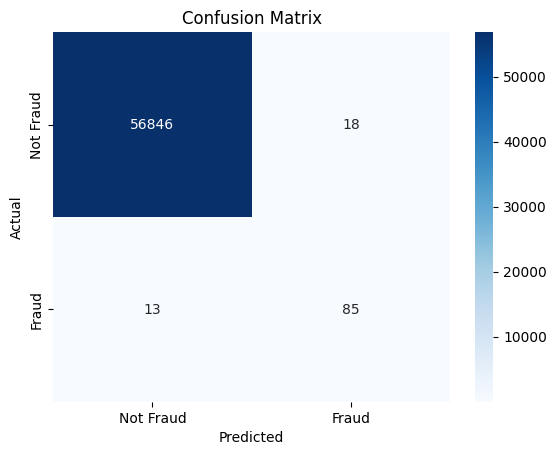

In [ ]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

xgb_model = xgb.XGBClassifier(
    n_estimators=300,
    max_depth=40,
    random_state=42,
    eval_metric='logloss'  
)

xgb_model.fit(X_train_resampled, y_train_resampled)

y_pred = xgb_model.predict(X_test)
y_proba = xgb_model.predict_proba(X_test)[:, 1]

print("First 10 predictions and Their Probality of Being Fraud:")
print(y_pred[:10])
print(y_proba[:10])

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Fraud", "Fraud"], yticklabels=["Not Fraud", "Fraud"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


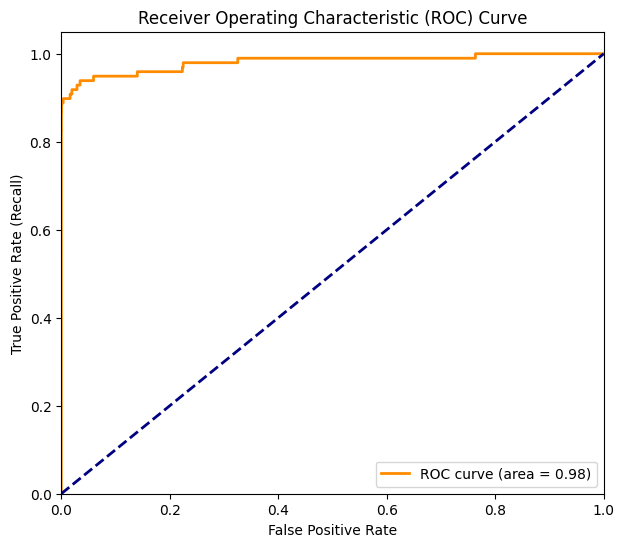

In [33]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


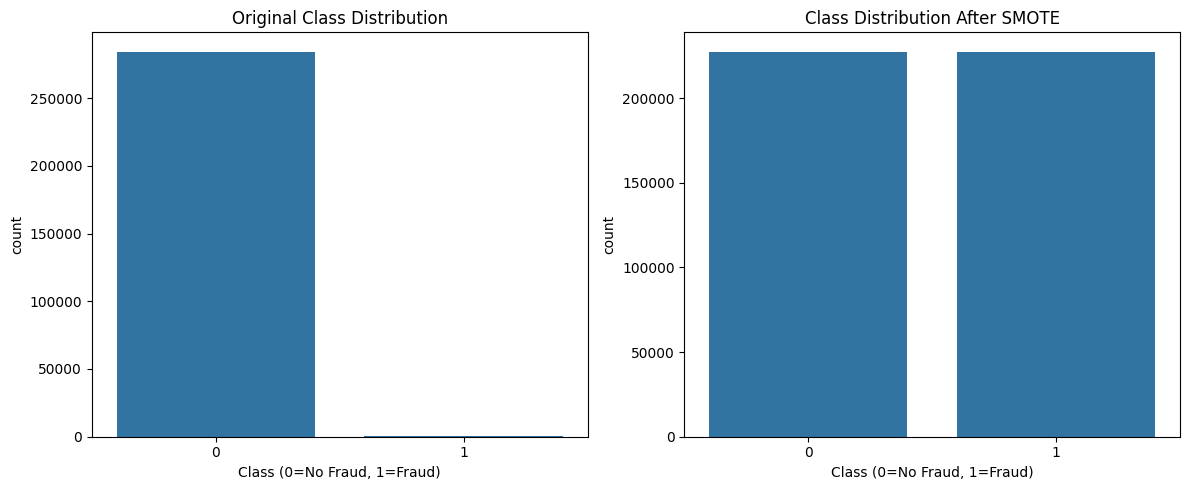

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Before SMOTE
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.countplot(x='Class', data=data)
plt.title('Original Class Distribution')
plt.xlabel('Class (0=No Fraud, 1=Fraud)')

# After SMOTE 
plt.subplot(1,2,2)
sns.countplot(x=y_train_resampled)
plt.title('Class Distribution After SMOTE')
plt.xlabel('Class (0=No Fraud, 1=Fraud)')

plt.tight_layout()
plt.show()
